# Exercice 1: Deep autoencoders

**Degree** Master Inter-Universitario de Data Science 

**Course** Machine Learning I

**Lecturer** Ignacio Heredia

---

**Objective**
Create a deep autoencoder and visualize the results.

**Duration**
40 min

---

In [2]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import manifold

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

**Load dataset**

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


**Create the model**

In [ ]:
########################################
#                                      #
#       FILL THIS WITH CODE!           #
#                                      #
########################################

input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img) # 32 neurons
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

**Train the model**

In [5]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1078 - val_loss: 0.0408
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0378 - val_loss: 0.0293
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0279 - val_loss: 0.0232
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0226 - val_loss: 0.0192
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0188 - val_loss: 0.0164
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0164 - val_loss: 0.0146
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - val_loss: 0.0133
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134 - val_loss: 0.0123
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0118 - val_loss: 0.0111
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0113 - val_loss: 0.0107
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

**Test the model**

In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step


**Plot the results**

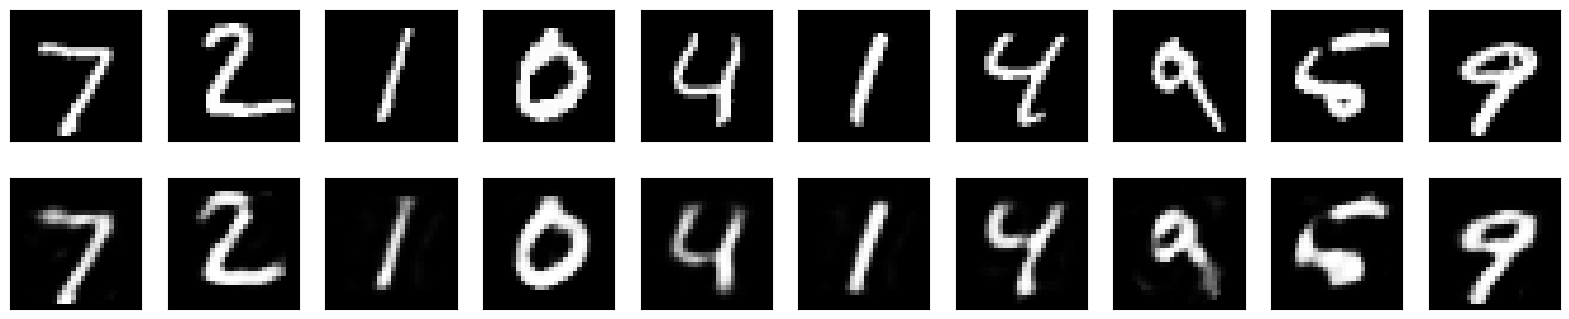

In [ ]:
########################################
#                                      #
#       FILL THIS WITH CODE!           #
#                                      #
########################################

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Cluster with t-SNE**

**Hint:** Check [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) function in sklearn.

/var/folders/6z/7vmhpff15y38vh6y2x4gbzwc0000gn/T/ipykernel_2149/183991312.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap=plt.cm.get_cmap("jet", 10))


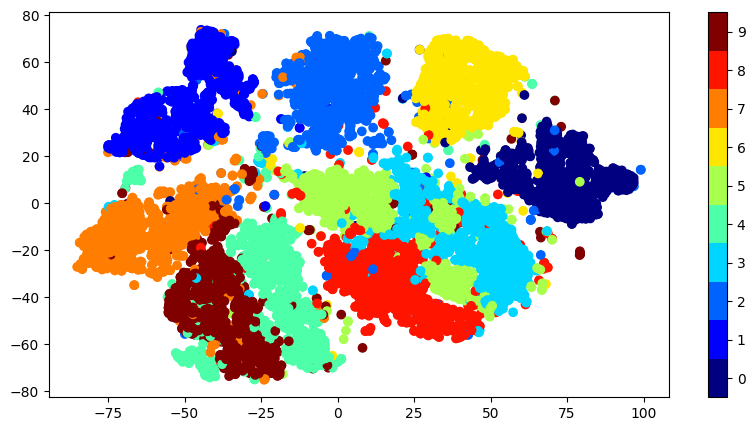

In [8]:
########################################
#                                      #
#       FILL THIS WITH CODE!           #
#                                      #
########################################

# Cluster with t-SNE
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(encoded_imgs)

plt.figure(figsize=(10, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show() 